# Part 1: Data preprocessing

Dataset: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

## Importing libraries

In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [676]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [677]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data exploration

In [678]:
dataset.shape

(10000, 14)

In [679]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Dealing with categorical values

In [680]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [681]:
dataset = dataset.drop(columns=["Surname"])

In [682]:
dataset.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [683]:
temp_dataset = dataset.iloc[:,4]

In [684]:
temp_dataset.shape

(10000,)

In [685]:
temp_dataset.head()

0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [686]:
temp_dataset = pd.get_dummies(data=temp_dataset,drop_first=True)

In [687]:
temp_dataset.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [688]:
dataset = dataset.drop(columns=['Gender'])
dataset = dataset.join(temp_dataset)

In [689]:
dataset.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,1,15634602,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


In [690]:
dataset =pd.get_dummies(data=dataset)

In [691]:
dataset.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


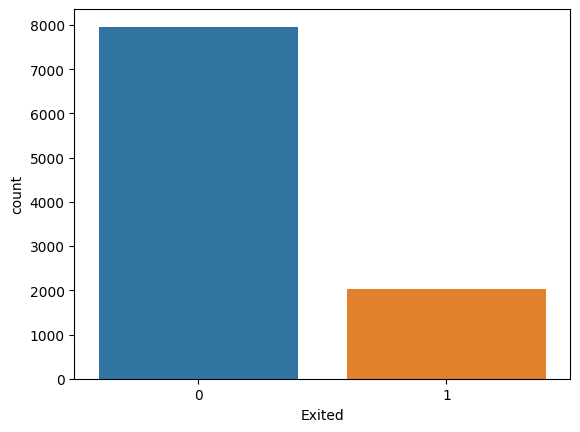

In [692]:
sns.countplot(dataset,x='Exited')
plt.show()

In [693]:
dataset_2 = dataset.drop(columns=['Exited'])

In [694]:
dataset_2.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


<Axes: title={'center': 'Correlated with Exited'}>

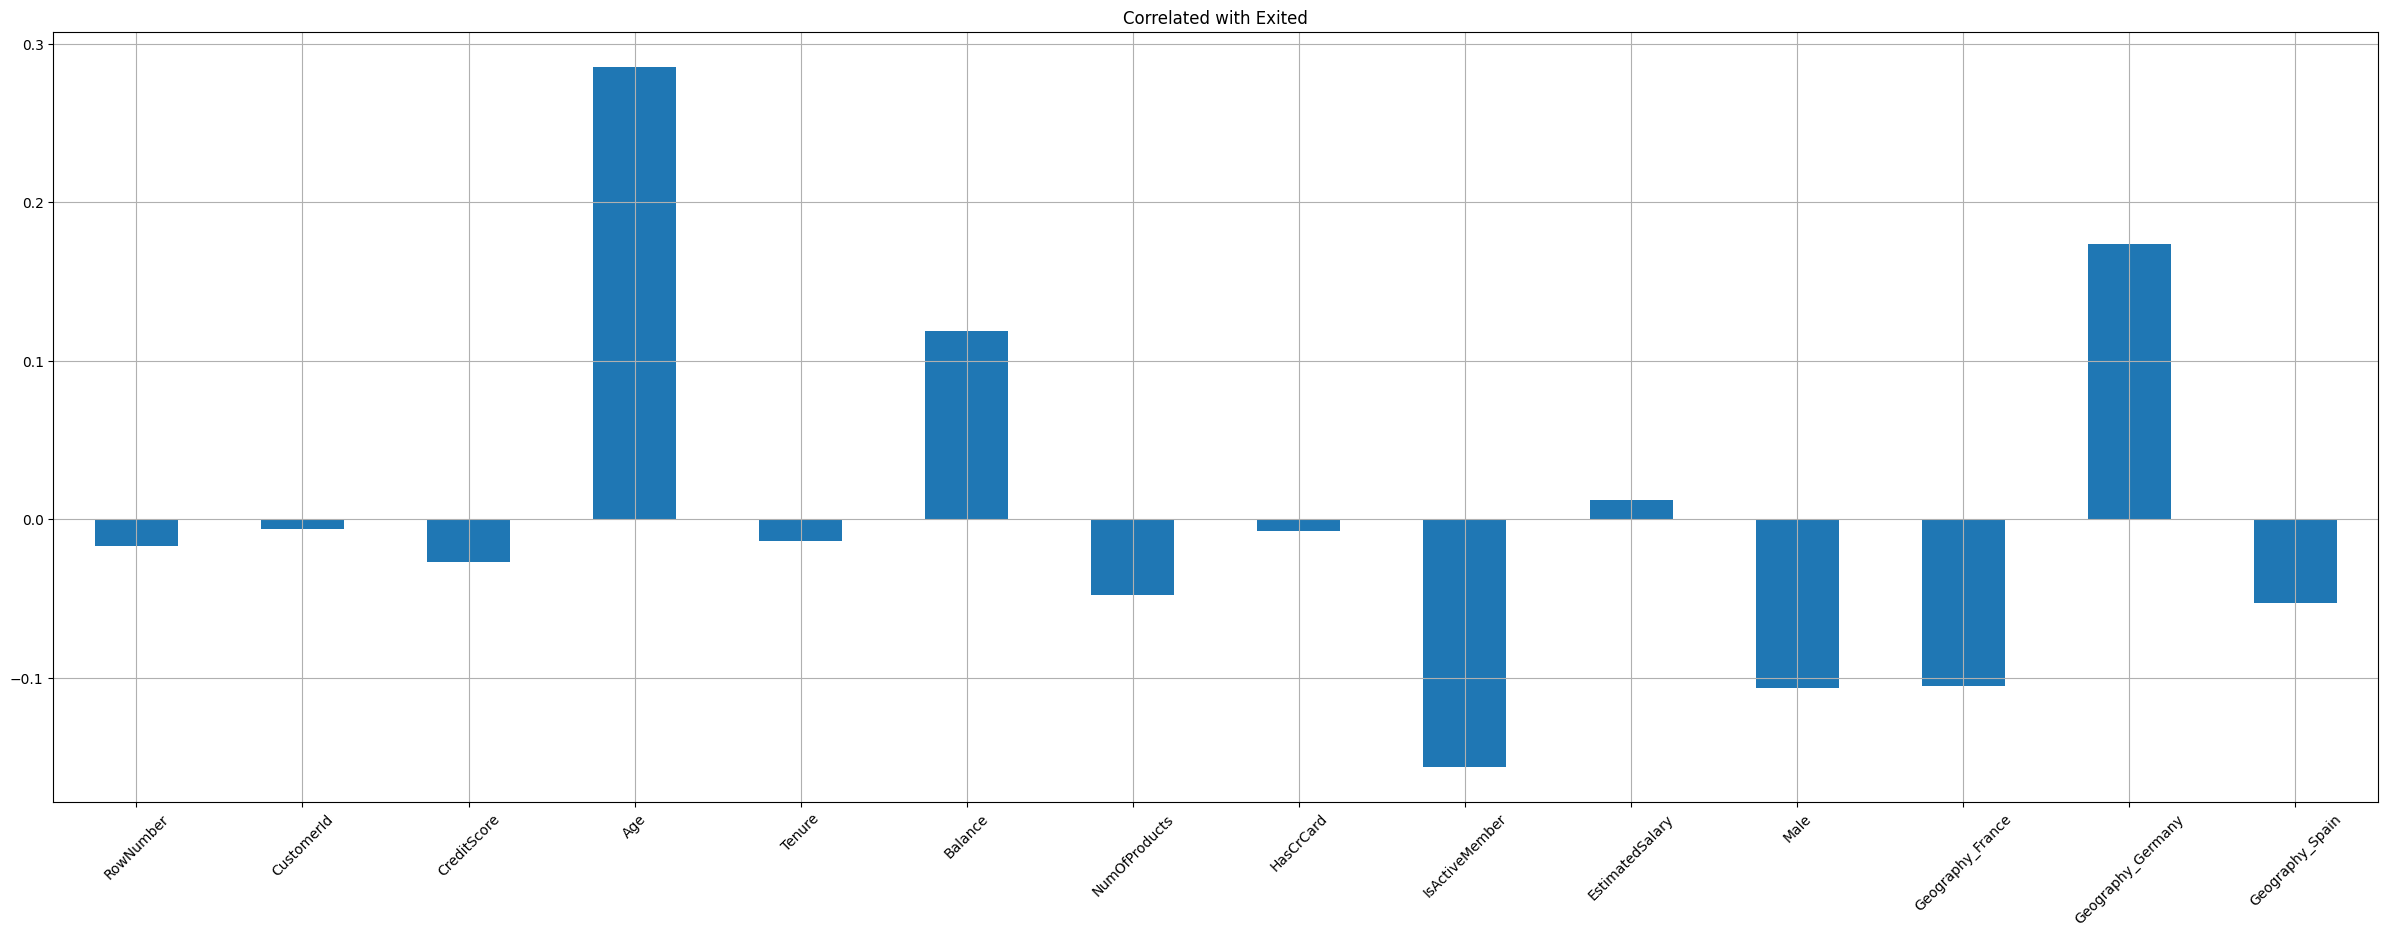

In [695]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(30,10), title = 'Correlated with Exited', rot=45, grid=True
)

In [696]:
corr = dataset.corr()

In [697]:
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,0.018196,0.008590,-0.000044,-0.009905
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.002641,-0.004049,-0.003097,0.007800
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.002857,-0.008928,0.005538,0.004780
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.027544,-0.039208,0.046897,-0.001685
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.014733,-0.002848,-0.000567,0.003868
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.012087,-0.231329,0.401110,-0.134892
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.021859,0.001230,-0.010419,0.009039
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.005766,0.002467,0.010577,-0.013480
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.022544,0.003317,-0.020486,0.016732
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.008112,-0.003332,0.010297,-0.006482


<Axes: >

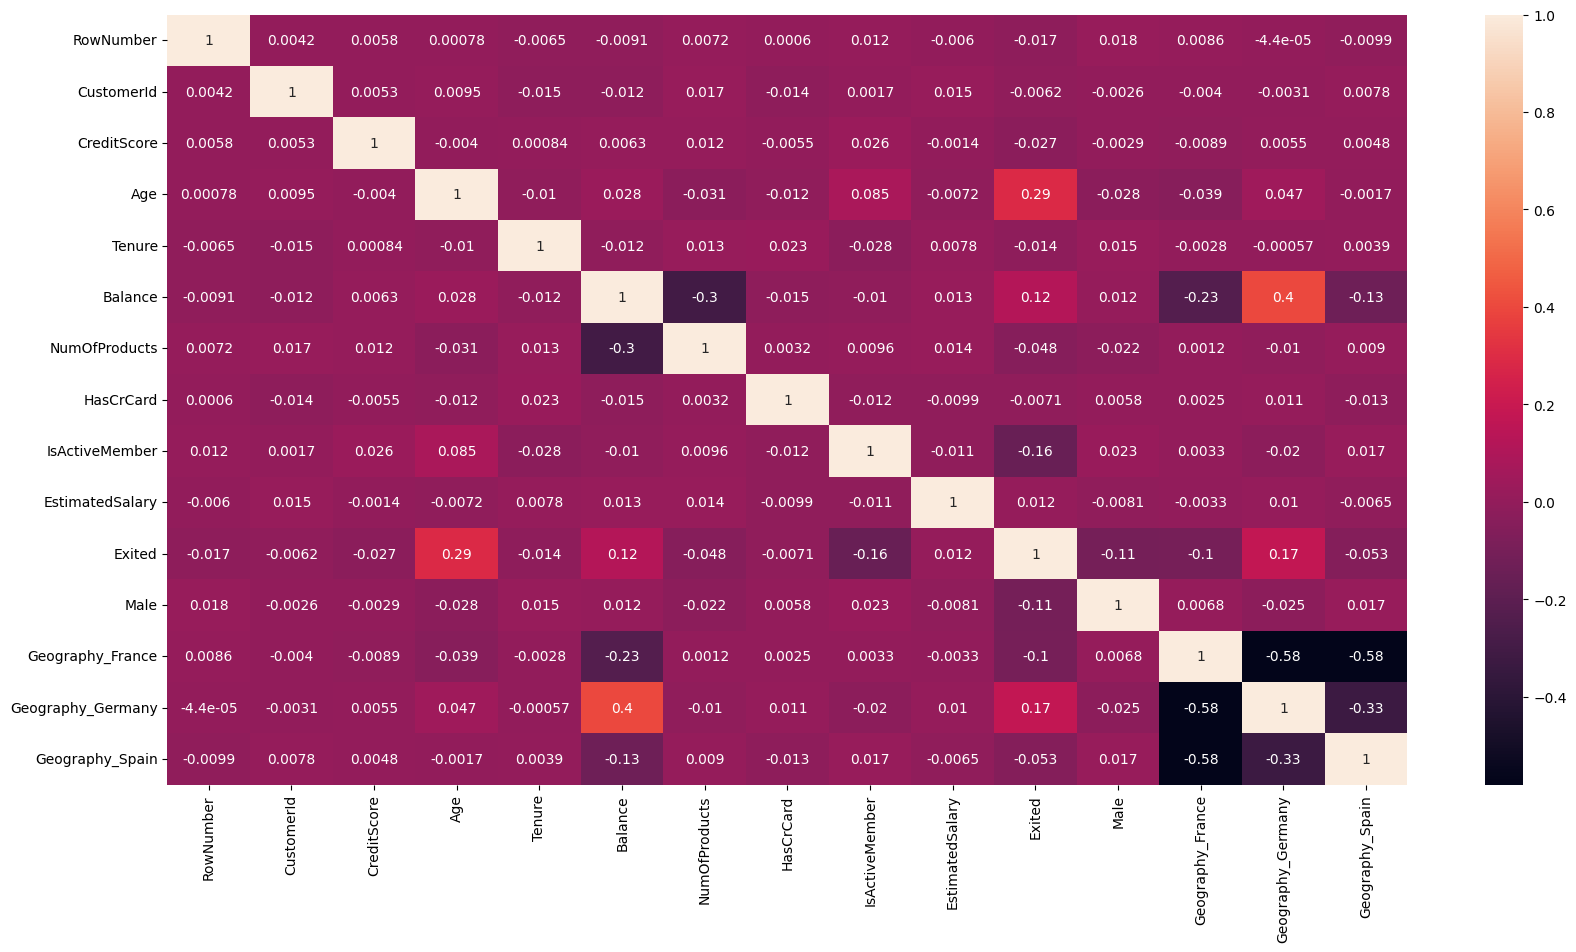

In [698]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset: train and test set

In [699]:
dataset.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [700]:
x = dataset.loc[:, ~dataset.columns.isin(['RowNumber','CustomerId','Exited'])]

In [701]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [702]:
y = dataset.loc[:, dataset.columns == 'Exited']

In [703]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [704]:
from sklearn.model_selection import train_test_split

In [705]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [706]:
x_train.shape

(8000, 12)

In [707]:
x_test.shape

(2000, 12)

In [708]:
y_train.shape

(8000, 1)

In [709]:
y_test.shape

(2000, 1)

## Feature Scaling

In [710]:
from sklearn.preprocessing import StandardScaler

In [711]:
sc = StandardScaler()

In [712]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [713]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.01460667,
         1.75486502, -0.57369368]])

In [714]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ..., -1.01460667,
         1.75486502, -0.57369368]])

# Part 2: Building the model

## 1) Logistic reggresion

In [715]:
from sklearn.linear_model import LogisticRegression

In [716]:
classifier_lr = LogisticRegression(random_state=0)

In [717]:
classifier_lr.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=0)

In [718]:
y_pred = classifier_lr.predict(x_test)

In [719]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [720]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [721]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Scrore', 'Precision', 'Recall'])

In [722]:
results

,Model,Accuracy,F1 Scrore,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [723]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


## Cross validation

In [724]:
from sklearn.model_selection import cross_val_score

In [725]:
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train.values.ravel(),cv=10)

In [726]:
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.83 %
Standard Deviation is 0.89 %


## Random forest

In [727]:
from sklearn.ensemble import RandomForestClassifier

classifier_rm = RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train, y_train)
y_pred = classifier_rm.predict(x_test)

C:\Users\arsik\AppData\Local\Temp\ipykernel_4204\2030152074.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rm.fit(x_train, y_train)


In [728]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Scrore', 'Precision', 'Recall'])

results = results.append(model_results, ignore_index = True)

results

C:\Users\arsik\AppData\Local\Temp\ipykernel_4204\1762186078.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,F1 Scrore,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8635,0.606061,0.729167,0.518519


In [729]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1517   78]
 [ 195  210]]


### Cross validation

In [730]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rm, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

C:\Users\arsik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\arsik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\arsik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was 

Accuracy is 85.82 %
Standard Deviation is 1.22 %
